In [59]:
import numpy as np
import pandas as pd
df_member = pd.read_csv('易速鲜花会员留存.csv')
df_member.head()
len(df_member.columns)

16

In [60]:
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [61]:
df_member.describe()

,用户码,入会月数,平均月消费
count,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,1.000000,0.000000,18.250000
25%,1761.500000,9.000000,35.500000
50%,3522.000000,29.000000,70.350000
75%,5282.500000,55.000000,89.850000
max,7043.000000,72.000000,118.750000


In [62]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df_member['总消费'])

df_member['总消费'] = pd.to_numeric(df_member['总消费'],errors='coerce')
df_member['总消费'].isna()
df_member['总消费'].fillna(0,inplace=True)
is_numeric_dtype(df_member['总消费'])


True

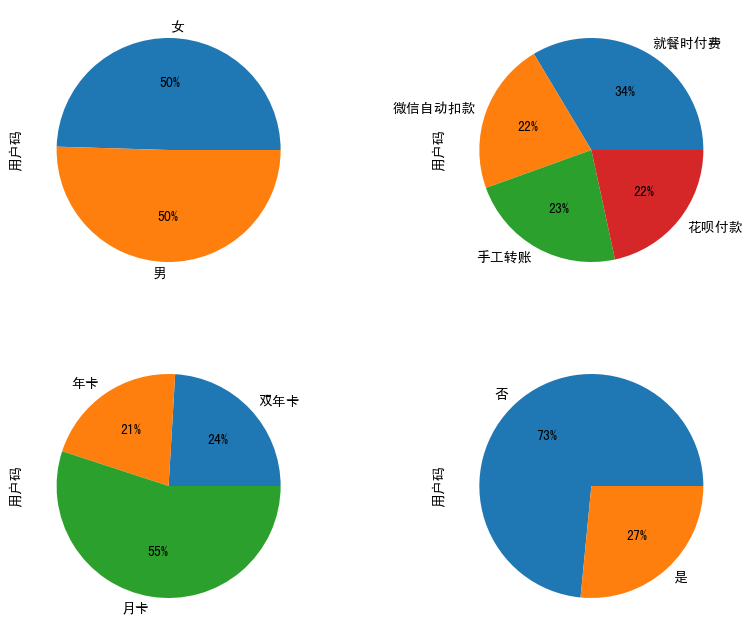

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,2)
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,3)
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.subplot(2,2,4)
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%')
plt.show()

In [64]:
df_member.head()


,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.30,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.40,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [65]:
df_member['性别'].replace(to_replace='女',value=0,inplace=True)
df_member['性别'].replace(to_replace='男',value=1,inplace=True)
df_member['已停付会费'].replace(to_replace='是',value=1,inplace=True)
df_member['已停付会费'].replace(to_replace='否',value=0,inplace=True)
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.30,0
1,2,1,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.40,0
2,3,1,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,1
3,4,1,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,1
4,5,0,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,0


In [66]:
binary_features =['玫瑰套餐','紫罗兰套餐','郁金香套餐','百合套餐','康乃馨套餐','胡姬花套餐','生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field]=='是'

In [67]:
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.6,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.9,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.9,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.0,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.4,571.45,0


pip install lifelines

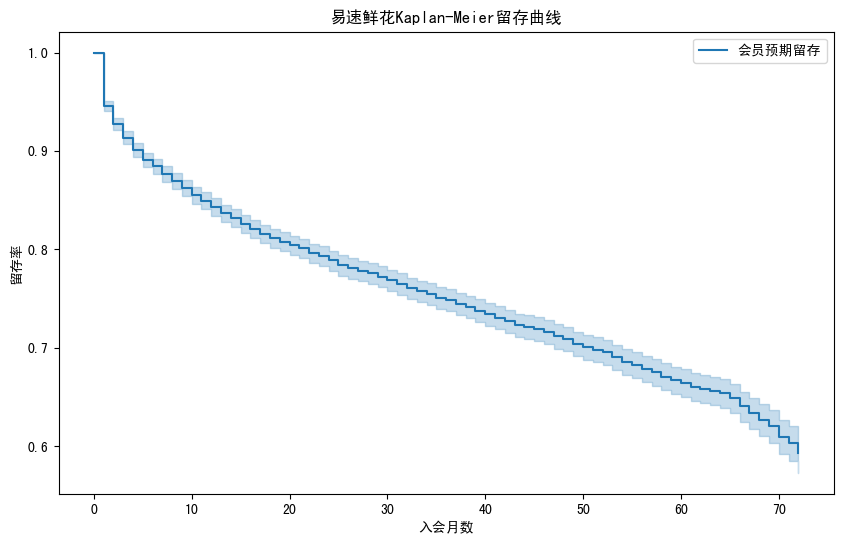

In [68]:
import lifelines
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df_member['入会月数'],event_observed=df_member['已停付会费'],label='会员预期留存')
fif,ax = plt.subplots(figsize=(10,6))
kmf.plot(ax=ax)
ax.set_title('易速鲜花Kaplan-Meier留存曲线')
ax.set_xlabel('入会月数')
ax.set_ylabel('留存率')
plt.show()

In [69]:
def life_by_cat(feature,t='入会月数',event='已停付会费',df=df_member,ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t],event_observed=df[idx][event],label=cat)
        kmf.plot(ax=ax,label=cat)

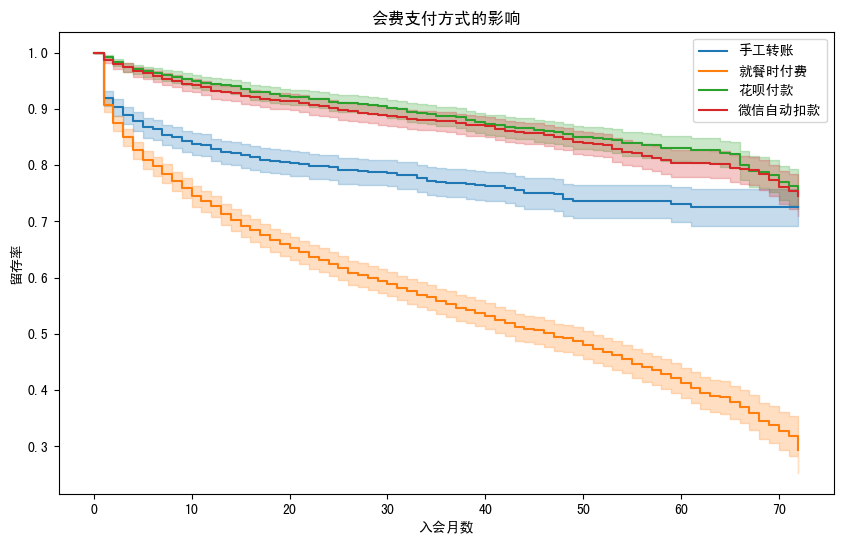

In [70]:
fig_pmt,ax_pmt= plt.subplots(figsize=(10,6))
life_by_cat(feature='会费支付方式',ax=ax_pmt)
ax_pmt.set_title('会费支付方式的影响')
ax_pmt.set_xlabel('入会月数')
ax_pmt.set_ylabel('留存率')
plt.show()

In [71]:
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.6,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.9,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.9,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.0,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.4,571.45,0


In [72]:
category_features = ['会员卡类型', '会费支付方式'] #要转换的分类的字段
df_member = pd.get_dummies(df_member,drop_first=True,columns=category_features)
#df_category_features= pd.get_dummies(df[category_features]) 
#df_category_features
df_member.head()b

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.6,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.9,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.9,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.0,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.4,571.45,0,False,True,False,False,True


In [45]:
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,...,平均月消费,总消费,已停付会费,会员卡类型_双年卡,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_就餐时付费,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,...,65.6,593.30,0,False,True,False,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,...,59.9,542.40,0,False,False,True,False,False,True,False
2,3,1,False,False,False,False,True,False,False,False,...,73.9,280.85,1,False,False,True,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,...,98.0,1237.85,1,False,False,True,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,...,69.4,571.45,0,False,False,True,False,False,False,True


In [73]:
#df_member.drop('会员卡类型_年卡',axis=1,inplace=True)
df_member.head()

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.6,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.9,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.9,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.0,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.4,571.45,0,False,True,False,False,True


In [74]:
cph = lifelines.CoxPHFitter()
cph.fit(df_member,duration_col='入会月数',event_col='已停付会费',show_progress=False)
#显示会员生存曲线
#cph.predict_survival_function(df_member.loc[3]).plot()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<Axes: >

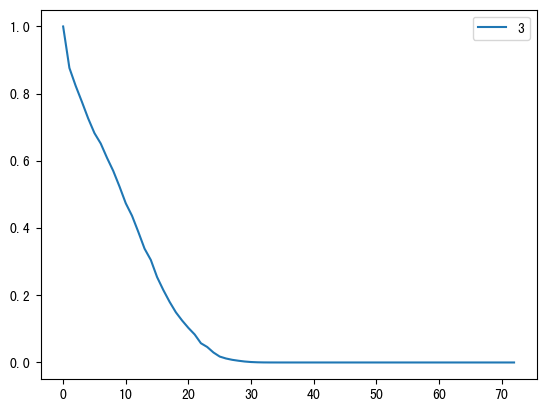

In [75]:
cph.predict_survival_function(df_member.loc[3]).plot()

<Axes: title={'center': '各个特征的留存相关系数'}, xlabel='log(HR) (95% CI)'>

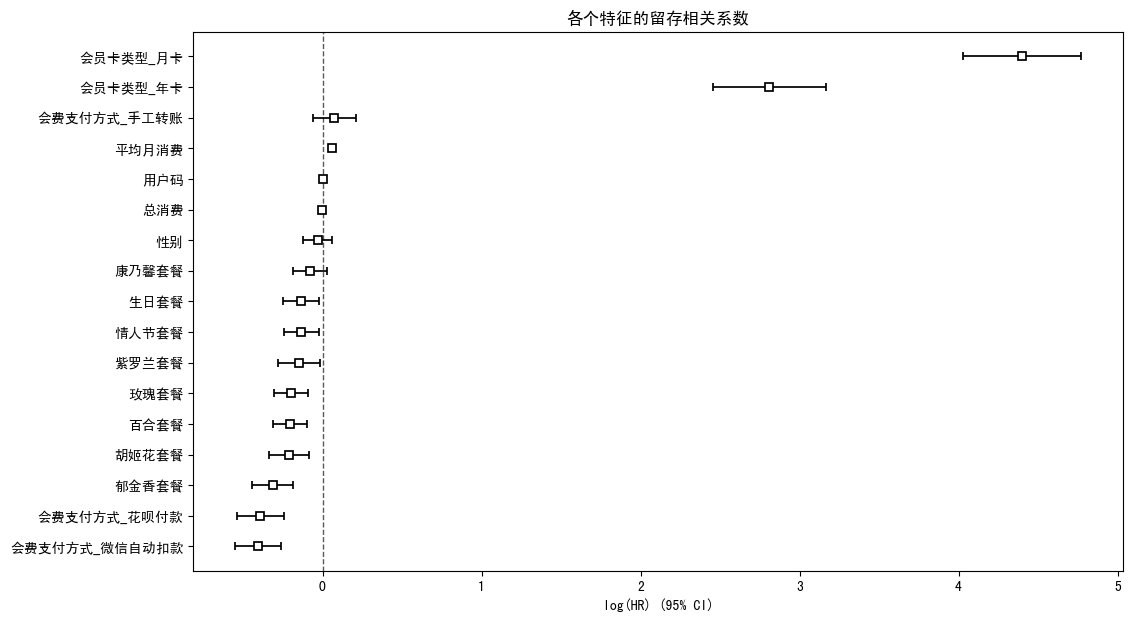

In [76]:
fig,ax = plt.subplots(figsize=(12,7))
ax.set_title('各个特征的留存相关系数')
cph.plot(ax=ax)

In [77]:
df_member.head()


,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.6,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.9,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.9,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.0,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.4,571.45,0,False,True,False,False,True


In [100]:
X= df_member.drop(['用户码','已停付会费'],axis=1)
#y= df_member['已停付会费']

y= df_member.已停付会费.values

In [110]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

print('SK-learn 逻辑回归的预测准确率{:.2f}%'.format(logreg.score(X_test,y_test)*100))

SK-learn 逻辑回归的预测准确率78.64%


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
y_pred_logreg = logreg.predict(X_test)
print('逻辑回归的第一个用户预测结果',y_pred_logreg[0])

逻辑回归的第一个用户预测结果 0


[[937 111]
 [190 171]]


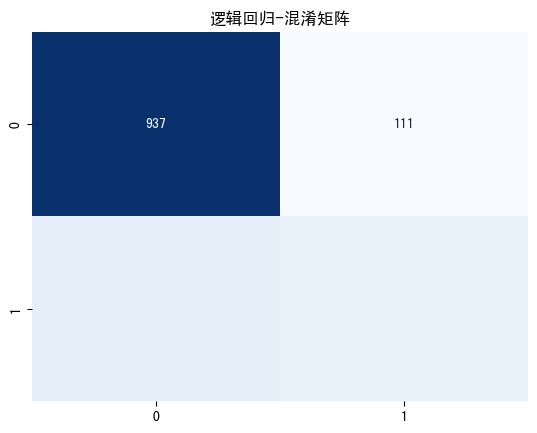

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def show_matrix(y_test,y_pred,label):
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    plt.title(label)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt='d',cbar=False)
    plt.show()

show_matrix(y_test,y_pred_logreg,label="逻辑回归-混淆矩阵")

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logreg,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1048
           1       0.61      0.47      0.53       361

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [ ]:
import keras
from keras.model import Sequential
from keras.layers import Dense
dnn = Sequential()
dnn.add(Dense(units=12,input_dim=17,activation='relu'))
dnn.add(Dense(units=24,activation='relu'))
dnn.add(Dense(units=1,activation='sgimod'))
dnn.summar()
dnn.compile(optimizer='RMSProp',
           loss='binary_crossentropy',
           metric=['acc'])

In [ ]:
X_train = np.asarray(X_train).astype(np.float)
X_test =  np.asarray(X_test).astype(np.float)
history = dnn.fit(X_train,y_train,
                 epochs=30,
                 batch_size=64,
                 validation=0.2)

In [ ]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    acc = history.history['acc'] #训练准确率
    val_acc = history.history['val_acc'] #验证准确率
    plt.subplot(1, 2, 2) #子图2
    plt.plot(epochs, acc, 'bo', label='Training acc') #训练准确率
    plt.plot(epochs, val_acc, 'b', label='Validation acc') #验证准确率
    plt.title('Training and validation accuracy') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Accuracy') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图
show_history(history) # 调用这个函数

In [ ]:
result= dnn.evaluate(X_test,y_test)
print('DNN测试预测准确率{0:2f}%'.format(result[1])*100)

In [ ]:
prediction = cnn.predict(X_test)
print('DNN的第一个用户预测结果',np.argmax(prediction[0]))

In [ ]:
from sklearn.preprocessingimport MinMaxScaler
scaler= MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)

history1 =  = dnn.fit(X_train1,y_train,
                 epochs=30,
                 batch_size=64,
                 validation=0.2)
show_history(history1)


In [ ]:
result= dnn.evaluate(X_test1,y_test)
print('DNN归一化后测试预测准确率{0:2f}%'.format(result[1])*100)